### 5 studies investigate difference between patients with high and low IPP
### Source:
1.  Castellanos LB, Clemente EP, Cabañas CB, Parra DM, Contador MB, Morera JCO, et al. Clinical Relevance of Intraperitoneal Pressure in Peritoneal Dialysis Patients. Peritoneal Dialysis International: Journal of the International Society for Peritoneal Dialysis. 2017;37(5): 562–567. https://doi.org/10.3747/pdi.2016.00267.
2.  Dejardin A, Robert A, Goffin E. Intraperitoneal pressure in PD patients: relationship to intraperitoneal volume, body size and PD-related complications. Nephrology Dialysis Transplantation. 2007;22(5): 1437–1444. https://doi.org/10.1093/ndt/gfl745.
3.  Outerelo MC, Gouveia R, Teixeira e Costa F, Ramos A. Intraperitoneal pressure has a prognostic impact on peritoneal dialysis patients. Peritoneal Dialysis International: Journal of the International Society for Peritoneal Dialysis. 2014;34(6): 652–654. https://doi.org/10.3747/pdi.2012.00192.
4.  Betancourt L, Pico S, Rojas E, Gordo MJ, Oliva JC, Almirall J, et al. Relationship between intraperitoneal pressure and the development of hernias in peritoneal dialysis: confirmation for the first time of a widely accepted concept. International Urology and Nephrology. 2023; https://doi.org/10.1007/s11255-023-03663-5.
5.  Aranda RA, Romão Jr. JE, Kakehashi E, Domingos W, Sabbaga E, Marcondes M, et al. Intraperitoneal pressure and hernias in children on peritoneal dialysis. Pediatric Nephrology. 2000;14(1): 0022–0024. https://doi.org/10.1007/s004670050005.


### Extractred data:
#### 2x2 contingency table
| Study ID         | Group      | Yes | No  | Sample size |
|------------------|------------|-----|-----|-------------|
| Castellanos2017  | High IPP   | 9   | 7   | 16          |
|                  | Low IPP    | 8   | 25  | 33          |
| Dejardin2007     | High IPP   | 6   | 24  | 30          |
|                  | Low IPP    | 8   | 23  | 31          |
| Outerelo2014     | High IPP   | 15  | 32  | 47          |
|                  | Low IPP    | 2   | 5   | 7           |
| Betancourt2023   | High IPP   | 15.02 | 46.94 | 61.96    |
|                  | Low IPP    | 7.98 | 54.06 | 62.04    |
| Aranda2000       | High IPP   | 5   | 2   | 7           |
|                  | Low IPP    | 2   | 5   | 7           |
#### Mean and standard deviation of IPP
| Study ID         | Group      | IPP mean | IPP SD |
|------------------|------------|----------|--------|
| Castellanos2017  | High IPP   | 22.29    | 2.62   |
|                  | Low IPP    | 18.78    | 2.6    |
| Dejardin2007     | High IPP   | 15.7     | 1.7    |
|                  | Low IPP    | 10.4     | 2.1    |
| Outerelo2014     | High IPP   | NA       | NA     |
|                  | Low IPP    | NA       | NA     |
| Betancourt2023   | High IPP   | 18.4     | 4.58   |
|                  | Low IPP    | 16.2     | 4.52   |
| Aranda2000       | High IPP   | 10.9     | 2.6    |
|                  | Low IPP    | 8.1      | 2.6    |

In [2]:
import numpy as np

# Data for each study
studies = {
    "Castellanos2017": {"Yes_High": 9, "No_High": 7, "Yes_Low": 8, "No_Low": 25},
    "Dejardin2007": {"Yes_High": 6, "No_High": 24, "Yes_Low": 8, "No_Low": 23},
    "Outerelo2014": {"Yes_High": 15, "No_High": 32, "Yes_Low": 2, "No_Low": 5},
    "Betancourt2023": {"Yes_High": 15.02, "No_High": 46.94, "Yes_Low": 7.98, "No_Low": 54.06},
    "Aranda2000": {"Yes_High": 5, "No_High": 2, "Yes_Low": 2, "No_Low": 5}
}

# Calculate odds ratio for each study
odds_ratios = {}

for study, data in studies.items():
    try:
        odds_high = data["Yes_High"] / data["No_High"]
        odds_low = data["Yes_Low"] / data["No_Low"]
        odds_ratio = odds_high / odds_low
    except ZeroDivisionError:
        odds_ratio = np.nan  # handle division by zero
    odds_ratios[study] = odds_ratio

odds_ratios


{'Castellanos2017': 4.017857142857143,
 'Dejardin2007': 0.71875,
 'Outerelo2014': 1.171875,
 'Betancourt2023': 2.167704091929867,
 'Aranda2000': 6.25}

### The calculated odds ratios for non-infectious complications between the high and low IPP groups for each study are as follows:

- Castellanos2017: 4.02
- Dejardin2007: 0.72
- Outerelo2014: 1.17
- Betancourt2023: 2.17
- Aranda2000: 6.25


### Data synthesis:

The DerSimonian and Laird random-effects method is a popular approach to combine study results in a meta-analysis when there's heterogeneity across studies. 

Given a 2x2 table for each study, the odds ratio (OR) and its variance can be calculated as:

$$
OR = \frac{a \times d}{b \times c}
$$
Where:
- $a$: Number of "Yes" in the High IPP group
- $b$: Number of "No" in the High IPP group
- $c$: Number of "Yes" in the Low IPP group
- $d$: Number of "No" in the Low IPP group

The variance of the log(OR) is:

$$
Var(\log(OR)) = \frac{1}{a} + \frac{1}{b} + \frac{1}{c} + \frac{1}{d}
$$

The weight for each study in the random-effects model is:

$$
w_i = \frac{1}{Var(\log(OR_i)) + \tau^2}
$$
Where:
- $ \tau^2 $ is the between-study variance, estimated using the DerSimonian and Laird method.

The pooled log odds ratio is:

$$
\log(OR_{pooled}) = \frac{\sum w_i \log(OR_i)}{\sum w_i}
$$

The variance of the pooled log odds ratio is:

$$
Var(\log(OR_{pooled})) = \frac{1}{\sum w_i}
$$


In [3]:
import math
from scipy.stats import chi2
import numpy as np

# Function to compute odds ratio and its variance for a study
def compute_or_and_var(a, b, c, d):
    or_value = (a * d) / (b * c)
    var_log_or = (1/a) + (1/b) + (1/c) + (1/d)
    return or_value, var_log_or

# Extract odds ratios and variances for each study
ors = []
vars = []
for study, data in studies.items():
    a = data["Yes_High"]
    b = data["No_High"]
    c = data["Yes_Low"]
    d = data["No_Low"]
    or_value, var_log_or = compute_or_and_var(a, b, c, d)
    ors.append(math.log(or_value) if or_value > 0 else np.nan)  # taking log(OR)
    vars.append(var_log_or)

# DerSimonian and Laird method to estimate tau^2
q_value = sum([(ors[i] - sum([w * ors[j] for j, w in enumerate(vars)]) / sum(vars)) ** 2 / vars[i] for i in range(len(studies))])
df = len(studies) - 1
tau2 = (q_value - df) / sum(vars) if q_value > df else 0

# Compute random effect weights and normalize them
weights = [1 / (vars[i] + tau2) for i in range(len(studies))]
total_weight = sum(weights)
normalized_weights = [w / total_weight for w in weights]

# Pooled log odds ratio and its variance
log_or_pooled = sum([normalized_weights[i] * ors[i] for i in range(len(studies))]) / sum(normalized_weights)
var_log_or_pooled = 1 / sum(normalized_weights)

# I^2 statistic and p-value of Q
i2 = max(0, (q_value - df) / q_value) * 100  # Percentage of total variation across studies due to heterogeneity
p_value_q = 1 if q_value <= df else (1 - chi2.cdf(q_value, df))

# Display results
results = {}
study_ids = list(studies.keys())
for i, study_id in enumerate(study_ids):
    results[study_id] = {
        "Effect (log OR)": ors[i],
        "95% CI Lower": ors[i] - 1.96 * math.sqrt(vars[i]),
        "95% CI Upper": ors[i] + 1.96 * math.sqrt(vars[i]),
        "Weight": normalized_weights[i]
    }

pooled_results = {
    "Effect (log OR)": log_or_pooled,
    "95% CI Lower": log_or_pooled - 1.96 * math.sqrt(var_log_or_pooled),
    "95% CI Upper": log_or_pooled + 1.96 * math.sqrt(var_log_or_pooled),
    "I^2": i2,
    "p-value of Q": p_value_q
}

display(results, pooled_results)

# Convert the log OR of the pooled estimate back to OR
pooled_or = math.exp(pooled_results["Effect (log OR)"])
# Convert the log OR 95% CI of the pooled estimate back to OR 95% CI
pooled_or_lower_limit = math.exp(pooled_results["95% CI Lower"])
pooled_or_upper_limit = math.exp(pooled_results["95% CI Upper"])

display(pooled_or, pooled_or_lower_limit, pooled_or_upper_limit)



{'Castellanos2017': {'Effect (log OR)': 1.390748711469271,
  '95% CI Lower': 0.12208467223569808,
  '95% CI Upper': 2.6594127507028436,
  'Weight': 0.21976585293702924},
 'Dejardin2007': {'Effect (log OR)': -0.33024168687057687,
  '95% CI Lower': -1.5333873223984853,
  '95% CI Upper': 0.8729039486573316,
  'Weight': 0.2269627758704144},
 'Outerelo2014': {'Effect (log OR)': 0.15860503017663857,
  '95% CI Lower': -1.5921881234159456,
  '95% CI Upper': 1.9093981837692229,
  'Weight': 0.17101865963497556},
 'Betancourt2023': {'Effect (log OR)': 0.7736685852996954,
  '95% CI Lower': -0.16976746733802783,
  '95% CI Upper': 1.7171046379374186,
  'Weight': 0.25579931045957693},
 'Aranda2000': {'Effect (log OR)': 1.8325814637483102,
  '95% CI Lower': -0.4865218112267393,
  '95% CI Upper': 4.151684738723359,
  'Weight': 0.12645340109800376}}

{'Effect (log OR)': 0.6874509760330485,
 '95% CI Lower': -1.2725490239669515,
 '95% CI Upper': 2.6474509760330482,
 'I^2': 42.33550686510645,
 'p-value of Q': 0.1392726010100328}

1.988639976172084

0.2801166868240643

14.118005605690914

### Individual Study Results:
| Study ID         | Effect (log OR) | 95% CI Lower | 95% CI Upper | Weight     |
|------------------|-----------------|--------------|--------------|------------|
| Castellanos2017  | 1.39            | 0.12         | 2.66         | 0.2198     |
| Dejardin2007     | -0.33           | -1.53        | 0.87         | 0.2270     |
| Outerelo2014     | 0.16            | -1.59        | 1.91         | 0.1710     |
| Betancourt2023   | 0.77            | -0.17        | 1.72         | 0.2558     |
| Aranda2000       | 1.83            | -0.49        | 4.15         | 0.1265     |

### Pooled Estimate:
- **Effect (log OR)**: 0.69
- **95% CI Lower**: -1.27
- **95% CI Upper**: 2.65
- **I²**: 42.34%
- **p-value of Q**: 0.1393

When converting the log odds ratio back to the odds ratio:
- **Pooled OR**: 1.99
- **95% CI for OR**: (0.28, 14.12)

### Visualization:

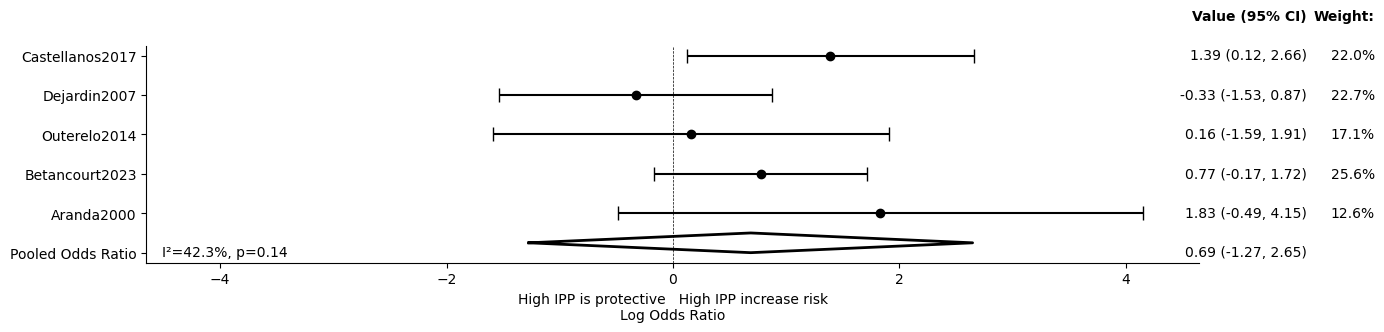

In [4]:
# Forest plot in the desired style
import matplotlib.pyplot as plt

study_names_provided = list(results.keys())
effects_provided = [results[study]["Effect (log OR)"] for study in study_names_provided]
lower_bounds_provided = [results[study]["95% CI Lower"] for study in study_names_provided]
upper_bounds_provided = [results[study]["95% CI Upper"] for study in study_names_provided]
# Adapting the provided code to visualize the forest plot based on our computed results

total_studies = len(results)
meta_analysis_results = {
    "Odds Ratio": {
        "study_ids": study_names_provided,
        "g_values": effects_provided,
        "ci_g_values": {study: [results[study]["95% CI Lower"], results[study]["95% CI Upper"]] for study in study_names_provided},
        "weights_percent": [weight * 100 for weight in normalized_weights],
        "g_bar_RE": pooled_results["Effect (log OR)"],
        "ci_g_bar_RE": [pooled_results["95% CI Lower"], pooled_results["95% CI Upper"]],
        "I2": pooled_results["I^2"],
        "p_value_Q": pooled_results["p-value of Q"]
    }
}

fig, ax = plt.subplots(figsize=(14, total_studies * 0.5 + len(meta_analysis_results)))

# Removing the top and right spines (borders)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Current y-position marker
current_y = total_studies + len(meta_analysis_results)

y_ticks = []
y_ticklabels = []

for var, data in meta_analysis_results.items():
    # Extract data for plotting
    y_positions = list(range(current_y - 1, current_y - len(data['study_ids']) - 1, -1))
    g_values = data['g_values']
    ci_low = [g - data['ci_g_values'][study][0] for study, g in zip(data['study_ids'], g_values)]
    ci_high = [data['ci_g_values'][study][1] - g for study, g in zip(data['study_ids'], g_values)]
    
    # Plot using errorbar
    ax.errorbar(g_values, y_positions, xerr=[ci_low, ci_high], fmt='o', color='black', capsize=5)
    
    # Adding labels with g-value, CI, and weight on the right
    for y, g, low, high, weight in zip(y_positions, g_values, ci_low, ci_high, data['weights_percent']):
        ax.text(5.6, y, f"{g:.2f} ({g-low:.2f}, {g+high:.2f})", ha='right', va='center', fontsize=10)
        ax.text(6.2, y, f"{weight:.1f}%", ha='right', va='center', fontsize=10)
    
    # Plotting the pooled results
    pooled_y = y_positions[-1] - 1
    pooled_x = [
        data['ci_g_bar_RE'][0],
        data['g_bar_RE'],
        data['ci_g_bar_RE'][1],
        data['g_bar_RE'],
        data['ci_g_bar_RE'][0]
    ]
    pooled_y_values = [
        pooled_y + 0.25,
        pooled_y,
        pooled_y + 0.25,
        pooled_y + 0.5,
        pooled_y + 0.25
    ]
    ax.plot(pooled_x, pooled_y_values, 'k-', linewidth=2)
    
    # Displaying I2 and p-value for the pooled estimate
    ax.text(-3.4, pooled_y, f"I²={data['I2']:.1f}%, p={data['p_value_Q']:.2f}", ha='right', va='center', fontsize=10)
    ax.text(5.6, pooled_y, f"{data['g_bar_RE']:.2f} ({data['ci_g_bar_RE'][0]:.2f}, {data['ci_g_bar_RE'][1]:.2f})", ha='right', va='center', fontsize=10)
    
    # Update the current_y marker and y-ticks
    current_y -= (len(data['study_ids']) + 2)
    y_ticks.extend(y_positions)
    y_ticks.append(pooled_y)
    y_ticklabels.extend(data['study_ids'])
    y_ticklabels.append(f"Pooled {var}")

# Setting y-ticks and labels
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticklabels)
ax.set_xlabel("High IPP is protective   High IPP increase risk\nLog Odds Ratio")

max_limit = max([g + ci for g, ci in zip(g_values, ci_high)]) + 0.5
min_limit = min([g - ci for g, ci in zip(g_values, ci_low)]) - 0.5
limit = max(abs(max_limit), abs(min_limit))
ax.set_xlim(-limit, limit)
# Adding "Weight:" at the top
ax.text(5.6, total_studies + len(meta_analysis_results), "Value (95% CI)", ha='right', va='center', fontsize=10, fontweight='bold')
ax.text(6.2, total_studies + len(meta_analysis_results), "Weight:", ha='right', va='center', fontsize=10, fontweight='bold')
ax.axvline(0, color='black', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.savefig('/mnt/d/pydatascience/pd-related trail/eipp_sr/Figure_5_1000dpi.png', dpi=1000)
plt.show()
